In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from intro_Data_4_2 import *

In [2]:
from sklearn.datasets import load_iris as li
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN

# Logistic Regression

## 1. Two class problem with one predictor

We will start by looking at a simplification of the Iris data - we will consider two classes: Virginica species and not Virginica species, and a single predictor.

In [3]:
# Load data, split into feature/target

data = li()
X = data.data
X_names = data.feature_names

y = data.target
y_names = data.target_names

X_df = pd.DataFrame(X,columns=X_names)
X_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
y_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# Make this a binary problem (virginia vs not virginica)
y_bin = np.array([1 if value == 2 else 0 for value in y])
y_bin_names = ['Not_virginica', 'Virginica']

In [7]:
y_bin

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
# Use one predictor (petal width)
col = 'petal width (cm)'
X = X_df[col]

X

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64

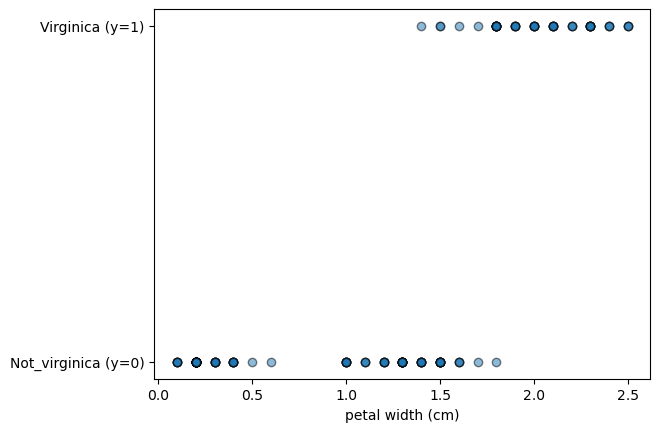

In [9]:
# make a scatterplot
plt.scatter(X,y_bin,alpha=0.5, ec='k')
plt.xlabel(col)
plt.yticks([0,1], [y_bin_names[i] + ' (y=' + str(i) + ')' for i in [0,1]])
plt.show()

In [10]:
#Create and fit model
log_reg = LR()
log_reg.fit(X.values.reshape(-1,1), y_bin)

LogisticRegression()

In [11]:
#Reminder of hard vs soft classifications
log_reg.predict(X[75:80].values.reshape(-1,1))

array([0, 0, 1, 0, 0])

In [12]:
log_reg.predict_proba(X[75:80].values.reshape(-1,1))

array([[0.75554163, 0.24445837],
       [0.75554163, 0.24445837],
       [0.45722097, 0.54277903],
       [0.66709636, 0.33290364],
       [0.94591643, 0.05408357]])

In [13]:
#Let's fit model to new (synthetic) data, petal widths from 0 to 3 (some code from Machine Learning book)
X_new = np.linspace(0,3,1000)
y_proba = log_reg.predict_proba(X_new.reshape(-1,1))



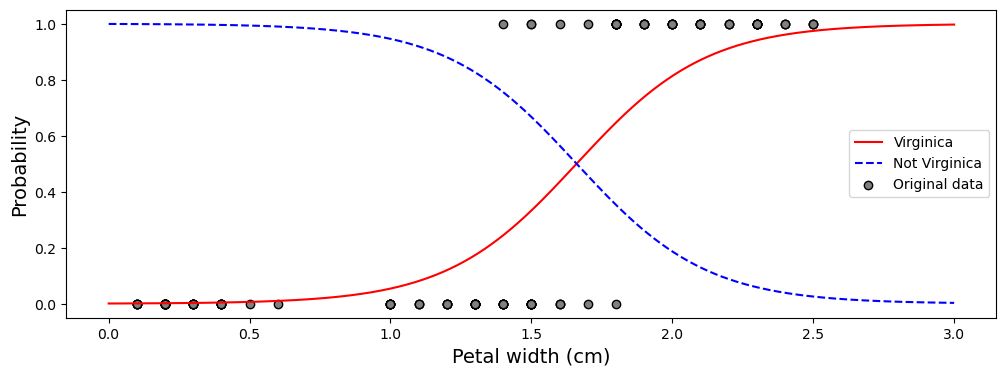

In [14]:
# Visualize the probability-feature curve
plt.figure(figsize = [12,4])
plt.plot(X_new, y_proba[:,1], 'r-', label = 'Virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label = 'Not Virginica')
colors = ['blue','red']
plt.scatter(X,y_bin, ec = 'k', c = 'grey', label = 'Original data')
plt.ylabel('Probability', fontsize=14)
plt.xlabel('Petal width (cm)',fontsize=14)
plt.legend()
plt.show()

## 2. Two class problem, all four predictors

Note that, by default, in sklearn the Logistic Regression will perform an L2 regularization (similar to the Ridge regression), therefore we should standardize our features.  Additionally, standardizing is going to speed up the convergence of the solution (you may try running it without the standardization and see what happens).  

We will look at a single test-train split.

In [15]:
X_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
# Logistic regression with all four features

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as SS

X = np.array(X_df)
Xtrain,Xtest,ytrain,ytest = tts(X,y_bin,test_size=0.4, random_state=146)

# Standardize the data
ss = SS()
Xtrain_s = ss.fit_transform(Xtrain)
Xtest_s = ss.transform(Xtest)

# Fit the model
log_reg.fit(Xtrain_s, ytrain)

# Generate predictions for the test set
y_pred = log_reg.predict(Xtest_s)

# Look at the confusion matrix 
#(compare_classes function is imported from intro_Data.py)
conf_mat, accuracy = compare_classes(ytest, y_pred, y_bin_names)
conf_mat

Accuracy = 0.95


Predicted,Not_virginica,Virginica
Actual,,
Not_virginica,38,3
Virginica,0,19


In [17]:
log_reg.score(Xtest_s, ytest)

0.95

[False False False False False False False False False False False False
 False False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False]


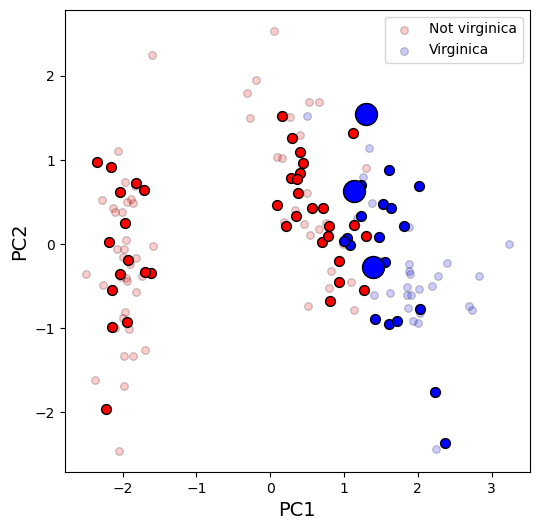

In [18]:
# Visualize misclassified data points

from sklearn.decomposition import PCA
colors = ['red', 'blue']
pca = PCA(n_components = 2)
Xtrain_pca = pca.fit_transform(Xtrain_s)
Xtest_pca = pca.transform(Xtest_s)

# Show the training data
fig,ax = plot_groups(Xtrain_pca, ytrain, colors, alpha = 0.2)
# Show the testing data
plot_groups(Xtest_pca, y_pred, colors, ax=ax, alpha = 1, s = 50)


# Highlight test points that were incorrectly labeled

idx_wrong = ytest != y_pred


plot_groups(Xtest_pca[idx_wrong], y_pred[idx_wrong], colors, ax=ax, alpha = 1, s = 250,
            legend_text = ['Not virginica', 'Virginica'], labels = ['PC1','PC2'])

print(idx_wrong)

plt.show()


## 3. All predictors, multiple class problem

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
# Logistic regression with all features and multiple classes

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as SS

X = np.array(X_df)
Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size=0.4, random_state=146)

# Standardize the data
ss = SS()
Xtrain_s = ss.fit_transform(Xtrain)
Xtest_s = ss.transform(Xtest)

# Fit the model
log_reg.fit(Xtrain_s, ytrain)

# Generate predictions for the test set
y_pred = log_reg.predict(Xtest_s)

# Look at the confusion matrix
conf_mat, accuracy = compare_classes(ytest, y_pred, y_names)
conf_mat

Accuracy = 0.95


Predicted,setosa,versicolor,virginica
Actual,,,
setosa,15,0,0
versicolor,0,23,3
virginica,0,0,19


In [21]:
log_reg.score(Xtest_s, ytest)

0.95

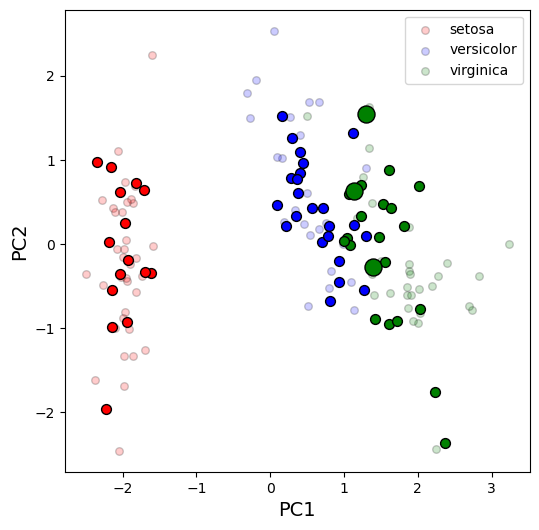

In [22]:
# Visualize misclassified data points

from sklearn.decomposition import PCA
# now there are three classes
colors = ['red', 'blue', 'green']
pca = PCA(n_components = 2)
Xtrain_pca = pca.fit_transform(Xtrain_s)
Xtest_pca = pca.transform(Xtest_s)

fig,ax = plot_groups(Xtrain_pca, ytrain, colors, alpha = 0.2)
plot_groups(Xtest_pca, y_pred, colors, ax=ax, alpha = 1, s = 50)
idx_wrong = ytest != y_pred
plot_groups(Xtest_pca[idx_wrong], y_pred[idx_wrong], colors, ax=ax, alpha = 1, s = 150,  
            legend_text = list(y_names), labels = ['PC1','PC2'])
plt.show()

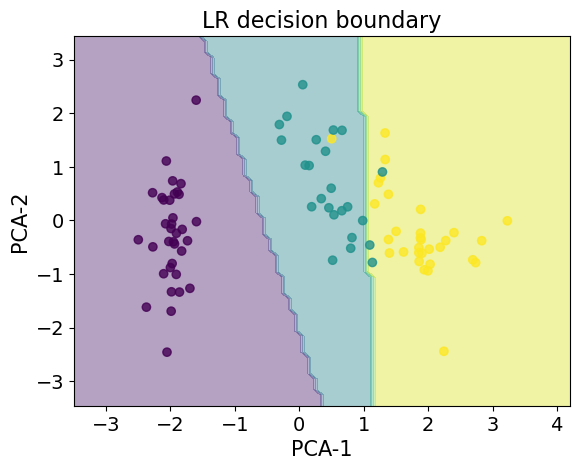

In [23]:
plt.figure()
plt.title("LR decision boundary",fontsize=16)
plot_decision_boundaries(Xtrain_pca,ytrain,LR)
plt.xlabel("PCA-1",fontsize=15)
plt.ylabel("PCA-2",fontsize=15)
plt.show()

## 4. Compare with kNN

In [24]:
#Step 1 - get best cross-validated kNN model
neighbor_range = np.array(range(2,20))

train=[]
test=[]

k = 10

ss = SS()
X_ss = ss.fit_transform(X)

for n_neighbors in neighbor_range:
    knn = KNN(n_neighbors=n_neighbors, weights = 'distance')
    tr,te = do_Kfold(knn,X_ss,y,k) #SS()
    
    train.append(np.mean(tr))
    test.append(np.mean(te))

In [25]:
idx = test == np.max(test)
print('Optimal #neighbors: ', neighbor_range[idx])
print('Optimal test score: ', np.max(test))

Optimal #neighbors:  [ 8 10 11 12 13 14 15]
Optimal test score:  0.9666666666666666


In [26]:
#Step 2 - let's look at cross-val results for just one optimal n_neighbors value 
knn = KNN(n_neighbors = 8, weights = 'distance')
tr_knn, te_knn = do_Kfold(knn, X_ss,y,10)

In [27]:
#Step 3 - cross-validation on LR
tr_lr, te_lr = do_Kfold(LR(),X_ss,y,10)

Which would you pick?

In [28]:
np.mean(te_knn)

0.9666666666666666

In [29]:
np.mean(te_lr)

0.9533333333333334

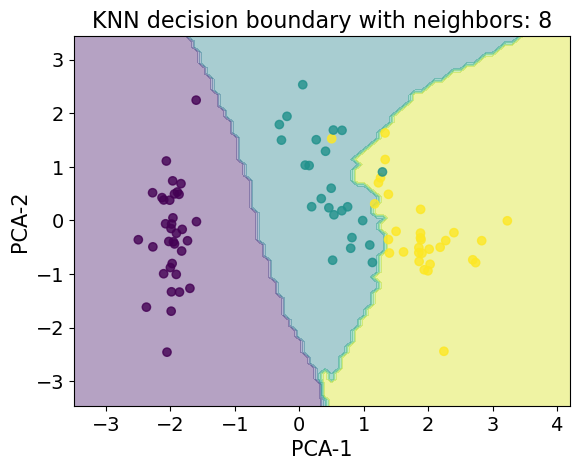

In [30]:
X = np.array(X_df)
Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size=0.4, random_state=146)

# Standardize the data
ss = SS()
Xtrain_s = ss.fit_transform(Xtrain)
Xtest_s = ss.transform(Xtest)

knn = KNN(n_neighbors=8, weights = 'distance')
knn.fit(Xtrain_s,ytrain)

plt.figure()
plt.title("KNN decision boundary with neighbors: 8",fontsize=16)
plot_decision_boundaries(Xtrain_pca,ytrain,KNN,n_neighbors=8)
plt.xlabel("PCA-1",fontsize=15)
plt.ylabel("PCA-2",fontsize=15)
plt.show()